<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name: Ardalan Gerami**

**Student Number: 99102112**


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer : The Local Field Potential (LFP) is the electric potential recorded in the extracellular space in brain tissue. Besides their invasive aspect, LFPs also sample relatively localized populations of neurons, as these signals can be very different for electrodes separated by 1 mm or by a few hundred microns. In contrast, the EEG samples much larger populations of neurons.

What is Gamma frequency entrainment? Explain (5 points)

- Your answer : 
Gamma frequency entrainment is a phenomenon that occurs when external stimuli, such as sound or visual cues, synchronize brainwave patterns to oscillate at a frequency around 40 Hz (40 cycles per second), which corresponds to the gamma brainwave range. This entrainment can occur through techniques like binaural beats, isochronic tones, or visual stimulation. Gamma brainwaves are associated with higher mental processing, memory recall, focus, and overall cognitive functioning.

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


- Your answer : Gamma entrainment can improve working memory and enhance cognitive performance. It may enhance episodic memory regulation by influencing theta and gamma oscillations. Gamma waves are linked to creativity and Creativity depends on the neurotransmitter dopamine. Increased gamma brain wave activity can lead to reduced anxiety and a sense of calm.
Researchers also explore gamma entrainment for treating neurological disorders like Alzheimer’s disease

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [1]:
# import all the necessary libraries here 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# f_s = 2000
# 

The size of the digitalByte :
1495741
The size of the channelData:
1495741


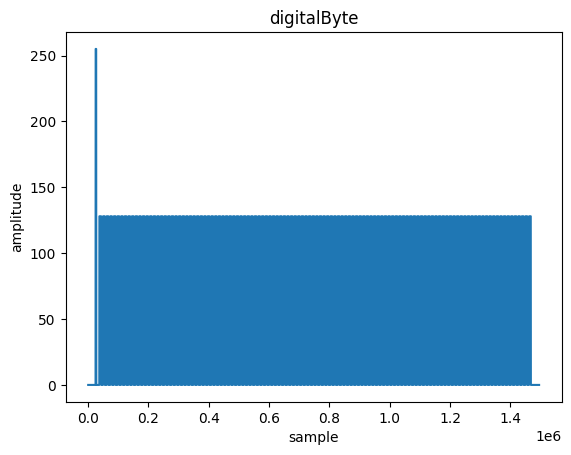

In [2]:
# Load the data from the file provided
#############################
# Your code goes here
data = sp.io.loadmat('sessionData.mat')
print('The size of the digitalByte :')
print(len(data['digitalByte']))
print('The size of the channelData:')
print(len(data['channelData']))
plt.figure()
plt.plot(data['digitalByte'])
plt.title('digitalByte')
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.show()
#############################

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

       explaination :  Isolating the frequencies of interest in the signal while filtering unwanted noise or frequencies that are not relevant to the analysis.

2. Convert the signal to 120 stimulus trials using digitalByte.

       explaination :  Splitting the signal into smaller stimulus trials can help in organizing and analyzing the data in a structured way.

3. Apply z-score normalization on each trial.

       explaination :  Z-score normalization standardizes the data by scaling it to have a mean of 0 and a standard deviation of 1, which can help in removing differences in scales and making the data more comparable and soft.


- Conclusion :  By following these preprocessing steps, we can enhance the quality of our data for further analysis.

In [3]:
# preprocess
def bandpass_filter(data, low_freq, high_freq):
    # Apply a band pass filter on the data
    #############################
    # Your code goes here
    fs = 2000
    order = 5
    nyq = 0.5 * fs
    low = low_freq / nyq
    high = high_freq / nyq
    b, a = sp.signal.butter(order, [low, high], btype='band')
    filtered_data = []
    for i in range(0,3):
        filtered_data.append(sp.signal.filtfilt(b, a, data['channelData'].T[i]))
    filtered_data = np.array(filtered_data).T
    return filtered_data
    #############################
    pass

def convert_to_trials(data):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    band_passed_data = bandpass_filter(data, 1, 300)
    start_end_indices = []
    is_pulse = False
    start_index = 0
    for i in range(len(data['digitalByte'])):
        if data['digitalByte'][i] != 0 and not is_pulse:  # Start of a pulse
            start_index = i+1
            is_pulse = True
        elif data['digitalByte'][i] == 0 and is_pulse:  # End of a pulse
            end_index = i +1
            start_end_indices.append([start_index, end_index])
            is_pulse = False
    if is_pulse:  # In case the signal ends with a pulse
        end_index = len(data['digitalByte']) - 1
        start_end_indices.append([start_index, end_index])
    start_end_indices.pop(0)
    trials = []
    for start, end in start_end_indices:
        trials.append(band_passed_data[start-1:end-1,:])
    return start_end_indices,trials
    #############################
    pass
    


def z_score(data):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    zscored_trials = []
    a = []
    start_end_indices,trialss = convert_to_trials(data)
    #trials T= trials.
    for t in trialss:
        for j in range(0,3):
            a.append(sp.stats.zscore(np.array(t.T[j])))
        zscored_trials.append(np.array(a).T)
        a = []
    return zscored_trials
    #############################
    pass
####


 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

- Your answer : 

Hippocampus = The hippocampus is a seahorse-shaped structure located in the medial temporal lobe. The hippocampus plays an important role in forming new memories. It consolidates short-term memories into long-term memories, also it helps us navigate our environment and create mental maps. This region handle the response against stress and emotional processing is another its duties.

mPFC (medial Prefrontal Cortex) = The mPFC is located in the frontal cortex, specifically in the medial part. One of the most important duties of this region is contributing in decision making, planning and goal setting. It also modulates emotional responses and social behavior and maintains information temporarily. The mPFC is associated with self-awareness and introspection too.

Ventral Striatum = The ventral striatum is part of the basal ganglia, situated deep within the brain. It plays a central role in reward anticipation and motivation. It also receives dopamine input from the midbrain, influencing pleasure and reinforcement.This region helps us in our choices and It contributes to the formation of habitual behaviors.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer : An Event-Related Potential (ERP) is the measured brain response resulting directly from a specific sensory, cognitive, or motor event. More formally, it represents any stereotyped electrophysiological response to a stimulus. ERPs provide a noninvasive means of evaluating brain functioning.

The formula :
 $$ERP = \frac{  \sum_1^N trials}{N}$$
* where N is number of the trials

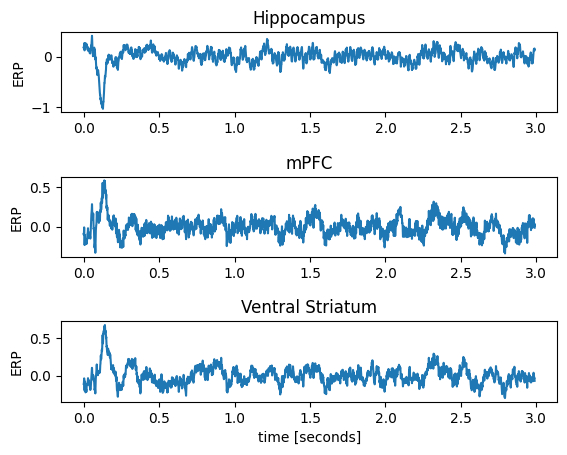

in one figure :


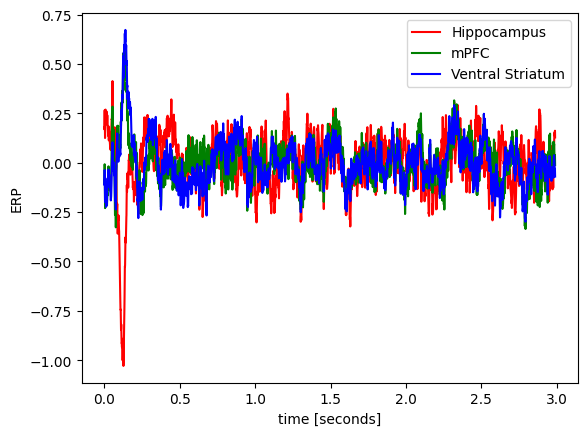

In [4]:
#ERP calculation
def ERP_calc(data):
    # Calsulate the ERP of the data
    #############################
    # Your code goes here
    trial = z_score(data)
    fs = 2000
    number_of_trilas = 120
    minimal_size_of_trilas = 5978
    Hippocampus = []
    mPFC = []
    Ventral_Striatum = []
    for i in range(0,number_of_trilas):
      Hippocampus.append(trial[i][0:minimal_size_of_trilas,0])
    for i in range(0,number_of_trilas):
       mPFC.append(trial[i][0:minimal_size_of_trilas,1])
    for i in range(0,number_of_trilas):
       Ventral_Striatum.append(trial[i][0:minimal_size_of_trilas,2])
    ERP_Hippocampus = np.sum(Hippocampus,axis=0)/len(Hippocampus)
    ERP_mPFC = np.sum(mPFC,axis=0)/len(mPFC)
    ERP_Ventral_Striatum = np.sum(Ventral_Striatum,axis=0)/len(Ventral_Striatum)
    return ERP_Hippocampus, ERP_mPFC, ERP_Ventral_Striatum
    #############################
    pass
minimal_size_of_trilas = 5978
fs = 2000
ERP_Hippocampus, ERP_mPFC, ERP_Ventral_Striatum = ERP_calc(data)
fig , axe = plt.subplots(3)
axe[0].plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_Hippocampus)
axe[0].set_title('Hippocampus')
axe[1].plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_mPFC)
axe[1].set_title('mPFC')
axe[2].plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_Ventral_Striatum)
axe[2].set_title('Ventral Striatum') 
axe[2].set_xlabel('time [seconds]')
for ax in axe.flat:
  ax.set(ylabel='ERP')
plt.subplots_adjust(hspace=0.8)
plt.show()
print('in one figure :')
plt.figure()
plt.plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_Hippocampus,color = 'red')
plt.plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_mPFC,color = 'green')
plt.plot([i/fs for i in range(0,minimal_size_of_trilas)] , ERP_Ventral_Striatum,color = 'blue')
plt.xlabel('time [seconds]')
plt.ylabel('ERP')
plt.legend(['Hippocampus','mPFC','Ventral Striatum'])
plt.show()

# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

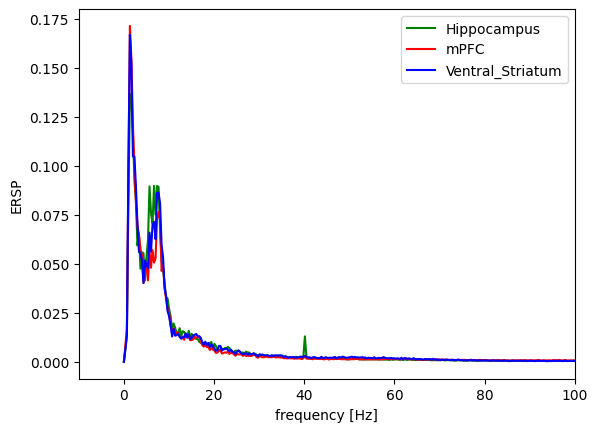

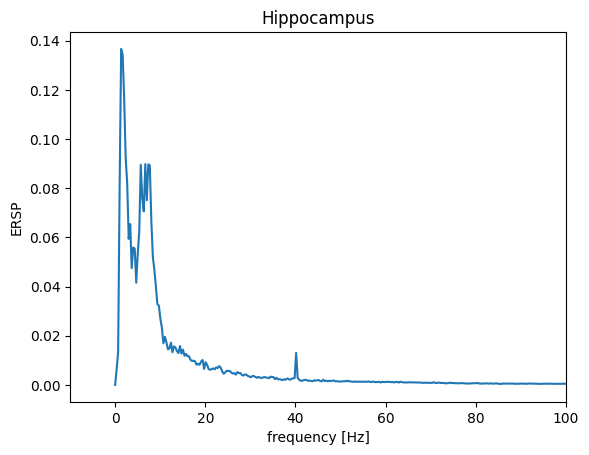

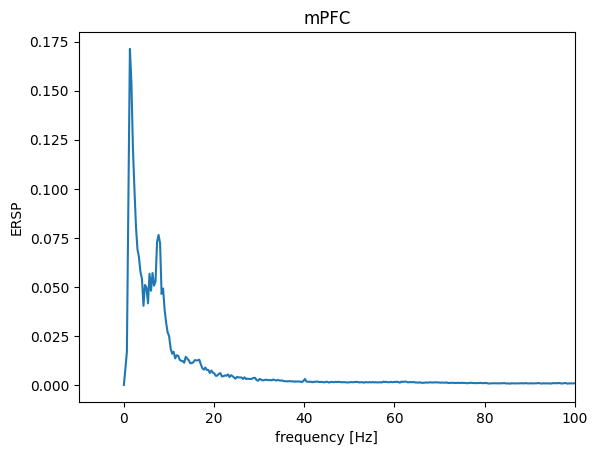

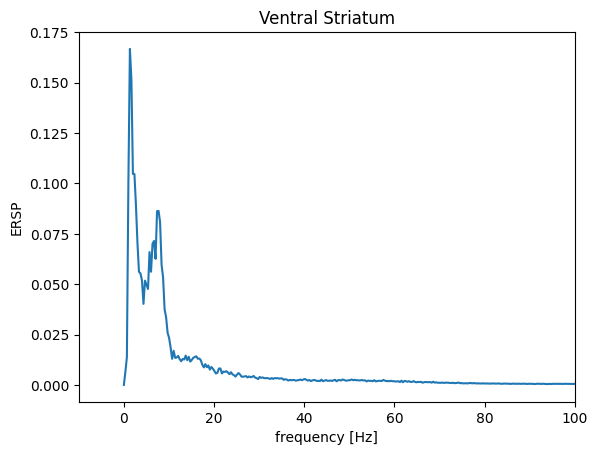

In [5]:
# ERSP calculation
def PSD(data, sample_rate):
    # Calsulate the PSD of the data
    #############################
    # Your code goes here
    frequencies, Pxx = sp.signal.periodogram(data, fs=sample_rate)
    return frequencies, Pxx
    #############################
    pass

def ERSP(trials):
    # Calsulate the ERSP of the data
    #############################
    # Your code goes here
    PSDs = []
    fs = 2000
    number_of_trials = 120
    for i in range(0,number_of_trials):
        frequencies, Pxx = PSD(trials[i],fs)
        PSDs.append(Pxx)
    w = np.sum(PSDs,axis=0)/len(PSDs)
    return frequencies, w
    #############################
    pass
number_of_trials = 120
minimal_size_of_trilas = 5978
trial = z_score(data)
Hippocampus = []
mPFC = []
Ventral_Striatum = []
for i in range(0,number_of_trials):
    Hippocampus.append(trial[i][0:minimal_size_of_trilas,0])
for i in range(0,number_of_trials):
    mPFC.append(trial[i][0:minimal_size_of_trilas,1])
for i in range(0,number_of_trials):
    Ventral_Striatum.append(trial[i][0:minimal_size_of_trilas,2])
f_max = 100
f_min = -10
frequencies_h , ersp_mean_h = ERSP(Hippocampus)
frequencies_m , ersp_mean_m = ERSP(mPFC)
frequencies_v , ersp_mean_v = ERSP(Ventral_Striatum)
plt.plot(frequencies_h , ersp_mean_h, color = 'green')
plt.plot(frequencies_m , ersp_mean_m, color = 'red')
plt.plot(frequencies_v , ersp_mean_v , color = 'blue')
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('ERSP')
plt.legend(['Hippocampus','mPFC','Ventral_Striatum'])
plt.show()
plt.plot(frequencies_h, ersp_mean_h)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('ERSP')
plt.title('Hippocampus')
plt.show()
plt.plot(frequencies_m , ersp_mean_m)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('ERSP')
plt.title('mPFC')
plt.show()
plt.plot(frequencies_v , ersp_mean_v)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('ERSP')
plt.title('Ventral Striatum')
plt.show()

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

- Your answer : ERSP calculates the average of PSD of trials but PSD of ERP first calculate the average of trials then calculate PSD of generated signal. As in PSD formula we have the squared term of fourier transform, PSD wouldn't be linear operator and obviously the results won't be same. In both we can see the peak at 40 Hz but in ERP the amplitude of the peak has decreased which is obvious because :

$$PSD(\frac {X_1 + X_2 + .... + X_n}{N}) < \frac{PSD(X_1) + PSD(X_2) + .... + PSD(X_n)}{N}$$

 where $X_i$ is the $i^{th}$ trial of signal(X)

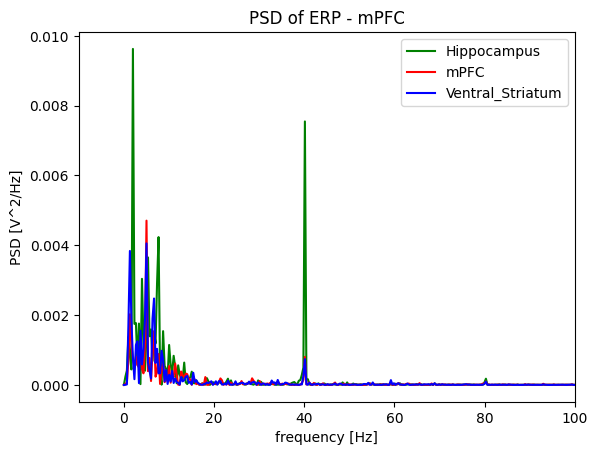

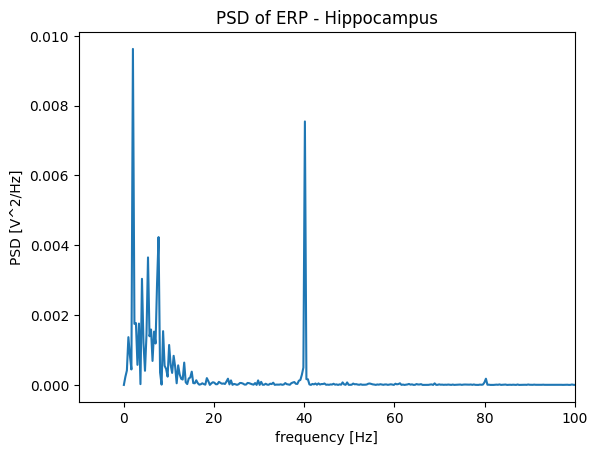

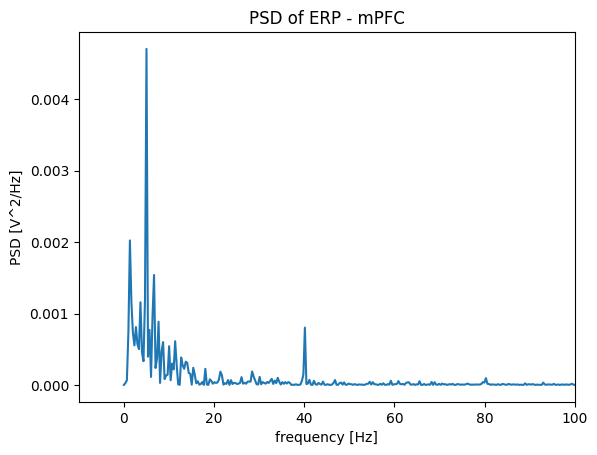

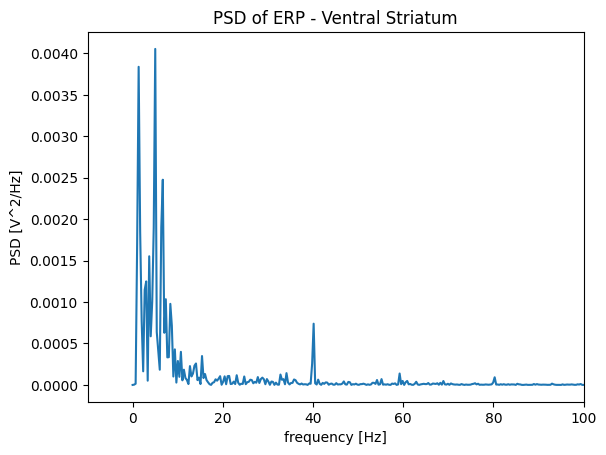

In [6]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here
fs = 2000
f_max = 100
f_min = -10
ERP_Hippocampus, ERP_mPFC, ERP_Ventral_Striatum = ERP_calc(data)
f,PSD_ERP_Hippocampus= PSD(ERP_Hippocampus,fs)
f,PSD_ERP_mPFC = PSD(ERP_mPFC,fs)
f,PSD_ERP_Ventral_Striatum = PSD(ERP_Ventral_Striatum,fs)
plt.plot(f,PSD_ERP_Hippocampus,color = 'green')
plt.plot(f,PSD_ERP_mPFC,color = 'red')
plt.plot(f,PSD_ERP_Ventral_Striatum,color = 'blue')
plt.xlim(f_min,f_max)
plt.legend(['Hippocampus','mPFC','Ventral_Striatum'])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.title('PSD of ERP - mPFC')
plt.show()
plt.plot(f,PSD_ERP_Hippocampus)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.title('PSD of ERP - Hippocampus')
plt.show()
plt.plot(f,PSD_ERP_mPFC)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.title('PSD of ERP - mPFC')
plt.show()
plt.plot(f,PSD_ERP_Ventral_Striatum)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.title('PSD of ERP - Ventral Striatum')
plt.show()
#############################

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer :  

- PLV = PLV quantifies the synchronization between two EEG/MEG signals based on their phase differences. The calculation of PLV can be described as Computing the instantaneous phase of each signal using the Hilbert transform then calculating the phase difference between the two signals at each time point, finally PLV is equal to one when the phase differences at different time points are constant; it tends to be zero when the phase differences are randomly distributed on the unit circle :

$$  PLV(k,l) =\frac{  |\sum_1^T e^{j(\phi_{k}(t)-\phi_{l}(t))}|}{T}        $$
  where k and l are two different regions of the brain and their related phase.





- PLI = focuses on the asymmetry of phase differences between two signals.The calculation of PLI can be described as Computing the instantaneous phase of each signal. Calculating the signed phase differences (positive or negative) between the signals, finally PLI is based on the absolute value of the average signed phase differences.

$$  PLI(k,l) =\frac{  |\sum_1^T sgn(Im(e^{j(\phi_{k}(t)-\phi_{l}(t))t}))|}{T}        $$
  where k and l are two different regions of the brain and their related phase.






* Comparision =
  - PLV:
    - Emphasizes consistency of phase differences.
    - Sensitive to volume conduction.
    - Useful for studying overall synchronization.
  - PLI:
    - Emphasizes directionality of phase coupling.
    - Less affected by volume conduction and noise.
    - Useful for studying directional interactions.
    - Captures asymmetry in phase relationships.


(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

Your answer : 
I avoid from defining PLI again.

- wPLI : 
    wPLI extends PLI by additionally accounting for the magnitude of the phase difference and emphasizes the weighting of phase differences based on their values. The calculation of wPLI can be described as Computing the instantaneous phase of each signal and Calculating the average magnitude of the phase differences,finally normalizing by dividing by the average magnitude of the absolute phase differences.

    $$wPLI =\frac{  |1/T\sum_1^T Im(cross\_spectral\_density(x(t),y(t)))|}{1/T\sum_1^T |Im(cross\_spectral\_density(x(t),y(t)))|}$$

- Comparision : 
    - PLI Focuses on the consistency of phase differences.
    - wPLI Emphasizes the imbalance in the weights of leading and lagging relationships.
    - wPLI is less sensitive to volume conduction and noise.
    - Researchers choose between PLI and wPLI based on their specific research questions and data characteristics.

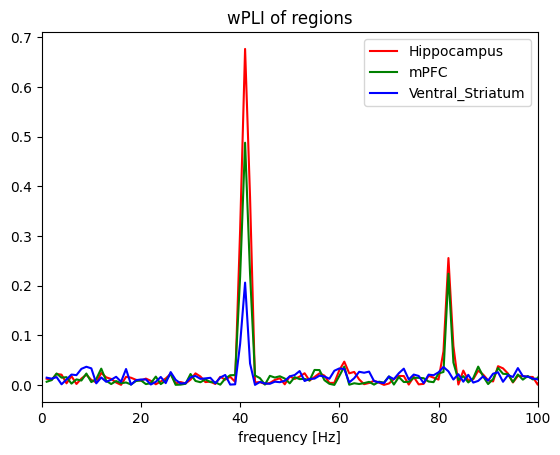

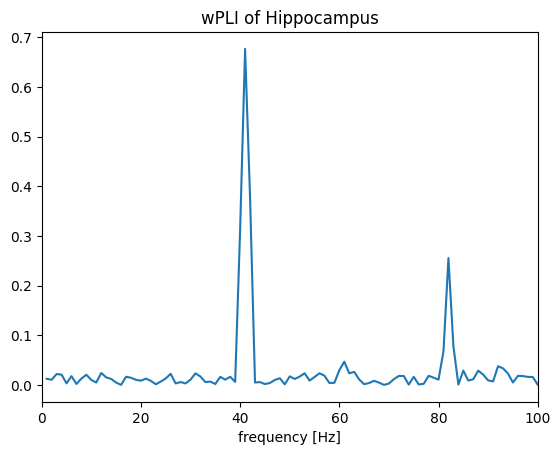

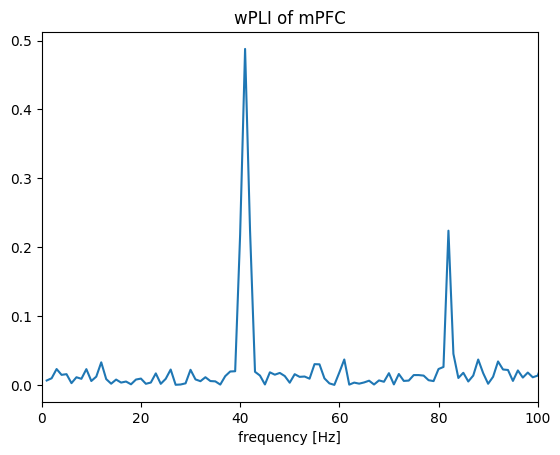

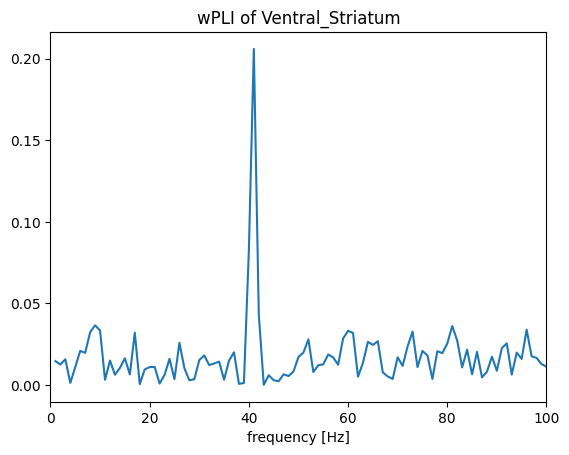

In [7]:
# WPLI
np.seterr(divide='ignore', invalid='ignore')
def WPLI(data):
    #############################
    # Your code goes here
    number_of_trials = 120
    fs = 2000
    triall = z_score(data)
    f_h_m = []
    Pxy_h_m = []
    f_h_v = []
    Pxy_h_v = []
    f_m_v = []
    Pxy_m_v = []
    for i in range(0,number_of_trials):
      for j in range(i,number_of_trials):
       f_h_m0, Pxy_h_m0 = sp.signal.csd(triall[i][:,0],triall[j][:,1],fs=fs,nperseg = 2048)
       f_h_m.append(f_h_m0)
       Pxy_h_m.append(Pxy_h_m0.T)
    for i in range(0,number_of_trials):
      for j in range(i,number_of_trials):
       f_h_v0, Pxy_h_v0 = sp.signal.csd(triall[i][:,0],triall[j][:,2],fs=fs,nperseg = 2048)
       f_h_v.append(f_h_v0)
       Pxy_h_v.append(Pxy_h_v0.T)
    for i in range(0,number_of_trials):
      for j in range(i,number_of_trials):
       f_m_v0, Pxy_m_v0 = sp.signal.csd(triall[i][:,1],triall[j][:,2],fs=fs,nperseg = 2048)
       f_m_v.append(f_m_v0)
       Pxy_m_v.append(Pxy_m_v0.T)
    wpli_h_m = np.abs(np.sum(np.imag(Pxy_h_m),axis=0))/np.sum(np.abs(np.imag(Pxy_h_m)),axis=0)
    wpli_h_v = np.abs(np.sum(np.imag(Pxy_h_v),axis=0))/np.sum(np.abs(np.imag(Pxy_h_v)),axis=0)
    wpli_m_v = np.abs(np.sum(np.imag(Pxy_m_v),axis=0))/np.sum(np.abs(np.imag(Pxy_m_v)),axis=0)
    return f_h_m,wpli_h_m,wpli_h_v,wpli_m_v
    #############################
    pass
f_max = 100
f_min = 0
f_h_m,wpli_h_m,wpli_h_v,wpli_m_v = WPLI(data)
plt.plot(wpli_h_m,color = 'red')
plt.plot(wpli_h_v,color = 'green')
plt.plot(wpli_m_v, color = 'blue')
plt.xlim(f_min,f_max)
plt.legend(['Hippocampus','mPFC','Ventral_Striatum'])
plt.xlabel('frequency [Hz]')
plt.title('wPLI of regions')
plt.show()
plt.plot(wpli_h_m)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.title('wPLI of Hippocampus')
plt.show()
plt.plot(wpli_h_v)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.title('wPLI of mPFC')
plt.show()
plt.plot(wpli_m_v)
plt.xlim(f_min,f_max)
plt.xlabel('frequency [Hz]')
plt.title('wPLI of Ventral_Striatum')
plt.show()